In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from datetime import datetime, timedelta
np.random.seed(1)

In [3]:
parse_dates=['date_created','date_deadline','date_launched','date_ended']
kickstarter_dataset = pd.read_csv('./kickstarter_dataset_updated.csv', parse_dates=parse_dates)

In [4]:
kickstarter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215800 entries, 0 to 215799
Data columns (total 49 columns):
backers_count               215800 non-null int64
blurb                       215792 non-null object
category                    215800 non-null object
category_name               215800 non-null object
category_specific           215800 non-null object
converted_pledged_amount    215800 non-null int64
country                     215800 non-null object
country_displayable_name    215800 non-null object
created_at                  215800 non-null int64
date_created                215800 non-null datetime64[ns]
creator                     215800 non-null object
currency                    215800 non-null object
currency_symbol             215800 non-null object
currency_trailing_code      215800 non-null bool
current_currency            215800 non-null object
deadline                    215800 non-null int64
date_deadline               215800 non-null datetime64[ns]
disable_comm

In [7]:
ks_suc_fail_only = kickstarter_dataset[kickstarter_dataset['state'].isin(['successful','failed'])]
ks_suc_fail_only.shape

(200232, 49)

In [6]:
kickstarter_dataset['state'].value_counts()

successful    124272
failed         75960
canceled        8857
live            6063
suspended        648
Name: state, dtype: int64

In [15]:
ks_suc_fail_from_2017 = ks_suc_fail_year[ks_suc_fail_only['date_launched'].dt.year.isin(['2019','2018','2017','2016','2015'])]
ks_suc_fail_from_2017.shape

(153576,)

In [55]:
kickstarter_dataset['date_launched'].head()

0   2019-06-26 14:46:37
1   2015-08-15 04:19:27
2   2018-06-19 15:43:54
3   2016-10-04 07:22:10
4   2011-09-04 17:04:28
Name: date_launched, dtype: datetime64[ns]

In [60]:
date_launched_year = kickstarter_dataset['date_launched'].dt.year
print(date_launched_year.value_counts())
date_launched_year.value_counts(normalize=True)

2019    44158
2015    37169
2016    29066
2018    28437
2017    28134
2014    25742
2013    10089
2012     7594
2011     3811
2010     1374
2009      226
Name: date_launched, dtype: int64


2019    0.204625
2015    0.172238
2016    0.134690
2018    0.131775
2017    0.130371
2014    0.119286
2013    0.046752
2012    0.035190
2011    0.017660
2010    0.006367
2009    0.001047
Name: date_launched, dtype: float64

In [14]:
test = kickstarter_dataset.copy()
test.head()

backers_count                                              blurb  \
0             31  Un livre enfant pour l’apprentissage des émoti...   
1            403  The true biography of the historical figure, w...   
2              2  FAM is the new mobile app which combines event...   
3            406  A graphic novel about two magical ladies in love.   
4              1  We are publishing a magazine that focuses on t...   

                                            category     category_name  \
0  {'id': 46, 'name': "Children's Books", 'slug':...  Children's Books   
1  {'id': 252, 'name': 'Graphic Novels', 'slug': ...    Graphic Novels   
2  {'id': 332, 'name': 'Apps', 'slug': 'technolog...              Apps   
3  {'id': 252, 'name': 'Graphic Novels', 'slug': ...    Graphic Novels   
4  {'id': 49, 'name': 'Periodicals', 'slug': 'pub...       Periodicals   

             category_specific  converted_pledged_amount country  \
0  publishing/children's books                       709      FR   
1        comics/graphic novels                     14740      US   
2              technology/apps                        14      GB   
3        comics/graphic novels                     21799      US   
4       publishing/periodicals                        10      US   

  country_displayable_name  created_at        date_created  ...       state  \
0                   France  1561554849 2019-06-26 13:14:09  ...  successful   
1        the United States  1438740713 2015-08-05 02:11:53  ...  successful   
2       the United Kingdom  1528401202 2018-06-07 19:53:22  ...      failed   
3        the United States  1473150836 2016-09-06 08:33:56  ...  successful   
4        the United States  1310702133 2011-07-15 03:55:33  ...      failed   

  state_changed_at          date_ended  static_usd_rate  \
0       1566744397 2019-08-25 14:46:37         1.140661   
1       1442204368 2015-09-14 04:19:28         1.000000   
2       1534607034 2018-08-18 15:43:54         1.327131   
3       1478131200 2016-11-03 00:00:00         1.000000   
4       1317747868 2011-10-04 17:04:28         1.000000   

                                                urls  \
0  {'web': {'project': 'https://www.kickstarter.c...   
1  {'web': {'project': 'https://www.kickstarter.c...   
2  {'web': {'project': 'https://www.kickstarter.c...   
3  {'web': {'project': 'https://www.kickstarter.c...   
4  {'web': {'project': 'https://www.kickstarter.c...   

                                            urls_web  \
0  {'project': 'https://www.kickstarter.com/proje...   
1  {'project': 'https://www.kickstarter.com/proje...   
2  {'project': 'https://www.kickstarter.com/proje...   
3  {'project': 'https://www.kickstarter.com/proje...   
4  {'project': 'https://www.kickstarter.com/proje...   

                                         url_project  \
0  https://www.kickstarter.com/projects/469036700...   
1  https://www.kickstarter.com/projects/katyrex/s...   
2  https://www.kickstarter.com/projects/findamoti...   
3  https://www.kickstarter.com/projects/patshand/...   
4  https://www.kickstarter.com/projects/134507405...   

                                          url_reward   usd_pledged  \
0  https://www.kickstarter.com/projects/469036700...    719.756813   
1  https://www.kickstarter.com/projects/katyrex/s...  14740.630000   
2  https://www.kickstarter.com/projects/findamoti...     14.598443   
3  https://www.kickstarter.com/projects/patshand/...  21799.000000   
4  https://www.kickstarter.com/projects/134507405...     10.000000   

        usd_type  
0       domestic  
1  international  
2       domestic  
3  international  
4       domestic  

[5 rows x 49 columns]

In [17]:
date_launched_year = test['date_launched'].dt.year
print(date_launched_year.value_counts())
date_launched_year.value_counts(normalize=True)

2019    44158
2015    37169
2016    29066
2018    28437
2017    28134
2014    25742
2013    10089
2012     7594
2011     3811
2010     1374
2009      226
Name: date_launched, dtype: int64


2019    0.204625
2015    0.172238
2016    0.134690
2018    0.131775
2017    0.130371
2014    0.119286
2013    0.046752
2012    0.035190
2011    0.017660
2010    0.006367
2009    0.001047
Name: date_launched, dtype: float64

In [127]:
test['date_launched'].head()

0   2019-06-26 14:46:37
1   2015-08-15 04:19:27
2   2018-06-19 15:43:54
3   2016-10-04 07:22:10
4   2011-09-04 17:04:28
Name: date_launched, dtype: datetime64[ns]

In [154]:
date_launched_month = test['date_launched'].dt.month
date_launched_month.value_counts().head()

10    21375
11    20784
7     19901
5     18875
8     18567
Name: date_launched, dtype: int64

In [153]:
date_launched_day = test['date_launched'].dt.day
date_launched_day.value_counts().head()

1     10203
15     7954
2      7704
5      7480
10     7473
Name: date_launched, dtype: int64

In [9]:
kickstarter_dataset.columns.get_loc('backers_count')+1
#df.columns.get_loc('backers_count'): 컬럼의 index번호를 알려주는데, 0부터 시작이기에 뒤에 +1을 하면 몇 번째인지 정확히 알 수 있음

1

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215800 entries, 0 to 215799
Data columns (total 49 columns):
backers_count               215800 non-null int64
blurb                       215792 non-null object
category                    215800 non-null object
category_name               215800 non-null object
category_specific           215800 non-null object
converted_pledged_amount    215800 non-null int64
country                     215800 non-null object
country_displayable_name    215800 non-null object
created_at                  215800 non-null int64
date_created                215800 non-null datetime64[ns]
creator                     215800 non-null object
currency                    215800 non-null object
currency_symbol             215800 non-null object
currency_trailing_code      215800 non-null bool
current_currency            215800 non-null object
deadline                    215800 non-null int64
date_deadline               215800 non-null datetime64[ns]
disable_comm

In [19]:
test.insert(27, 'date_launched_year', date_launched_year)

In [26]:
df_2019 = test[test['date_launched_year']==2019]

In [57]:
df_2019.to_csv('kickstarter_2019.csv', index=False, encoding='utf-8')

In [27]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44158 entries, 0 to 215797
Data columns (total 50 columns):
backers_count               44158 non-null int64
blurb                       44158 non-null object
category                    44158 non-null object
category_name               44158 non-null object
category_specific           44158 non-null object
converted_pledged_amount    44158 non-null int64
country                     44158 non-null object
country_displayable_name    44158 non-null object
created_at                  44158 non-null int64
date_created                44158 non-null datetime64[ns]
creator                     44158 non-null object
currency                    44158 non-null object
currency_symbol             44158 non-null object
currency_trailing_code      44158 non-null bool
current_currency            44158 non-null object
deadline                    44158 non-null int64
date_deadline               44158 non-null datetime64[ns]
disable_communication       44

In [ ]:
# 2019년 데이터로만 전처리, 분석 및 모델링 시도

In [2]:
parse_dates=['date_created','date_deadline','date_launched','date_ended']
df_2019 = pd.read_csv('./kickstarter_2019.csv', parse_dates=parse_dates)

In [8]:
august = df_2019[df_2019['date_launched'].dt.month == 8]
august['url_project'][1]

'https://www.kickstarter.com/projects/gplive/gp-live?ref=discovery_category_newest'

In [136]:
# seconds --> days, hours, minutes, seconds
import datetime 
def convert_seconds(s): 
    return str(datetime.timedelta(seconds=s)) #

convert_seconds(342356)

'3 days, 23:05:56'

In [148]:
project_duration_s = df_2019['deadline']-df_2019['launched_at']
project_duration_days = project_duration_s.apply(lambda x: convert_seconds(x)) #위의 datetime.timedelta(seconds=) 적용
project_duration_days.head(15)

0      60 days, 0:00:00
7      30 days, 0:00:00
8     24 days, 23:00:00
13     30 days, 1:00:00
15     60 days, 0:00:00
20     45 days, 0:00:00
33     30 days, 0:00:00
35    15 days, 12:00:00
44     30 days, 0:00:00
51     25 days, 0:00:00
52     30 days, 0:00:00
53      9 days, 1:37:54
58     28 days, 6:25:51
60     30 days, 0:00:00
64    29 days, 11:33:22
dtype: object

In [31]:
project_duration_days = project_duration_s.apply(lambda x: x/(24*60*60)) # seconds / (total seconds per a day)
project_duration_days.head(15)

0     60.000000
7     30.000000
8     24.958333
13    30.041667
15    60.000000
20    45.000000
33    30.000000
35    15.500000
44    30.000000
51    25.000000
52    30.000000
53     9.067986
58    28.267951
60    30.000000
64    29.481505
dtype: float64

In [30]:
#위의 project_duration_days와 같은 거지만, 여긴 seconds로 표현한 것
project_duration_seconds = df_2019['deadline']-df_2019['launched_at']
project_duration_seconds.head()

#나중에 며칠 걸린건지 제대로 보고싶다면 days로 바꿔주면 됨

0     5184000
7     2592000
8     2156400
13    2595600
15    5184000
dtype: int64

In [29]:
df_2019['fund_recruitment_period'] = project_duration_seconds
df_2019['fund_recruitment_period'].head()

C:\Users\Playdata\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     5184000
7     2592000
8     2156400
13    2595600
15    5184000
Name: fund_recruitment_period, dtype: int64

In [32]:
actual_project_duration = df_2019['state_changed_at']-df_2019['launched_at']
actual_project_duration.head()

0     5184000
7     2592002
8     2156400
13    2595600
15     151221
dtype: int64

In [33]:
df_2019['actual_time_taken'] = actual_project_duration
df_2019['actual_time_taken'].head()

C:\Users\Playdata\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     5184000
7     2592002
8     2156400
13    2595600
15     151221
Name: actual_time_taken, dtype: int64

In [35]:
df_corr = df_2019.corr()

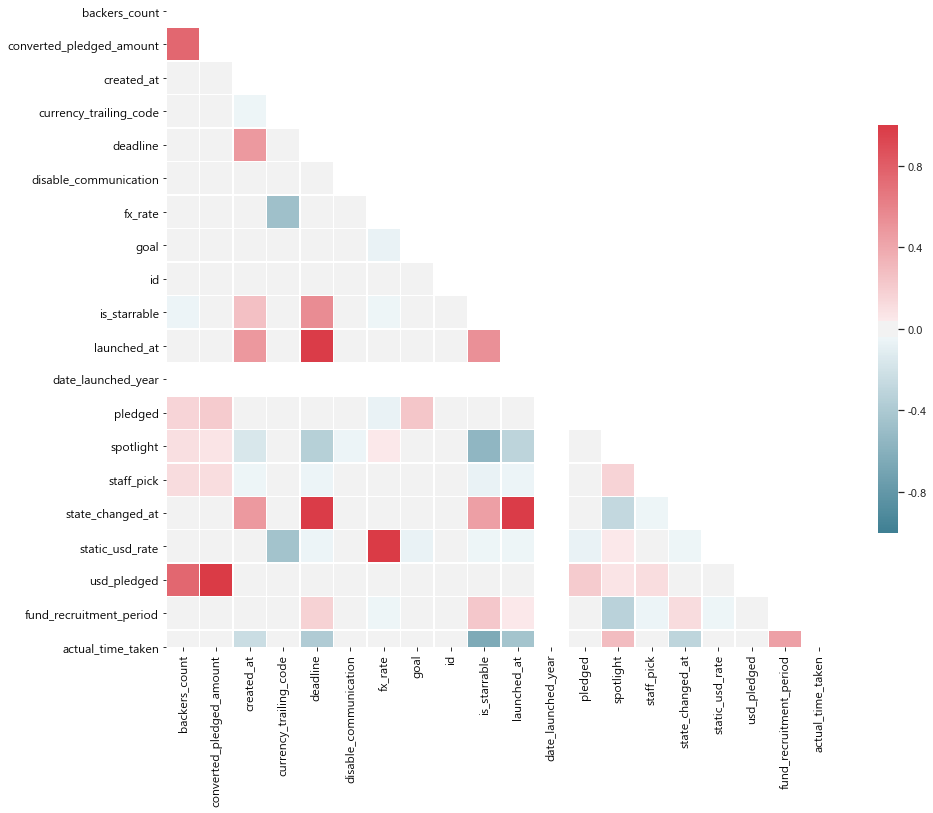

In [36]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, \
            #xticklabels=df_loans1.columns, yticklabels=df_loans1.columns, \
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [39]:
df_2019['category_name'].nunique()

159

In [38]:
category_counts = df_2019['category_name'].value_counts().head(50)
category_counts

Tabletop Games      4047
Product Design      3800
Comic Books         1598
Accessories         1584
Illustration        1503
Art                 1001
Apparel              984
Children's Books     964
Apps                 936
Graphic Novels       930
Playing Cards        901
Gadgets              827
Video Games          751
Documentary          688
Shorts               656
Music                648
Comedy               581
Fiction              541
Nonfiction           534
Art Books            488
Digital Art          480
Web                  480
Country & Folk       462
Drama                456
Drinks               435
Anthologies          416
Photobooks           387
Hardware             380
Jewelry              364
Mixed Media          354
Restaurants          351
Rock                 342
Animation            320
Painting             301
Pop                  298
Indie Rock           298
Software             291
Footwear             285
Small Batch          263
Graphic Design       263


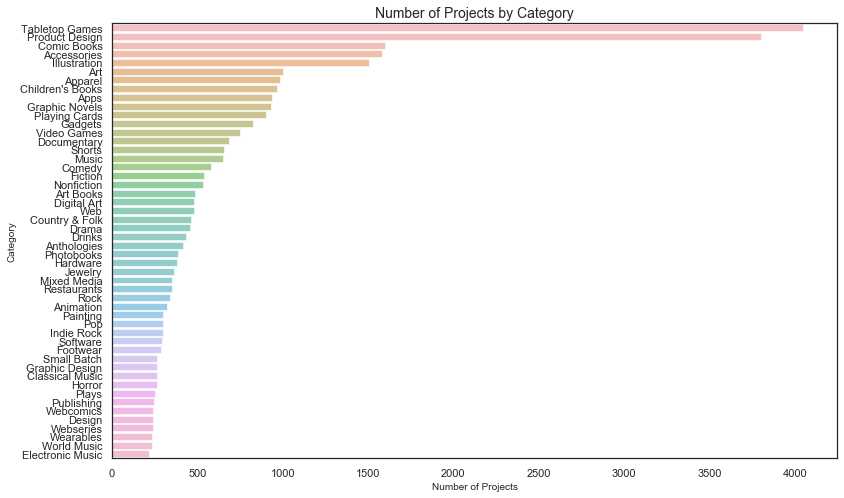

In [40]:
plt.figure(figsize=(13,8))
sns.barplot(x=category_counts.values, y=category_counts.index, alpha=0.6)
plt.title("Number of Projects by Category", fontsize=14)
plt.xlabel("Number of Projects", fontsize=10)
plt.ylabel("Category", fontsize=10)
plt.show()

In [49]:
country_counts = df_2019['country_displayable_name'].value_counts().head(50)
country_counts

the United States     26087
the United Kingdom     6101
Canada                 2351
Australia              1273
Germany                1147
Mexico                 1038
France                  981
Italy                   842
Spain                   834
Hong Kong               747
Sweden                  433
the Netherlands         393
Singapore               339
Japan                   291
New Zealand             235
Denmark                 231
Switzerland             222
Belgium                 185
Ireland                 164
Austria                 138
Norway                  107
Luxembourg               19
Name: country_displayable_name, dtype: int64

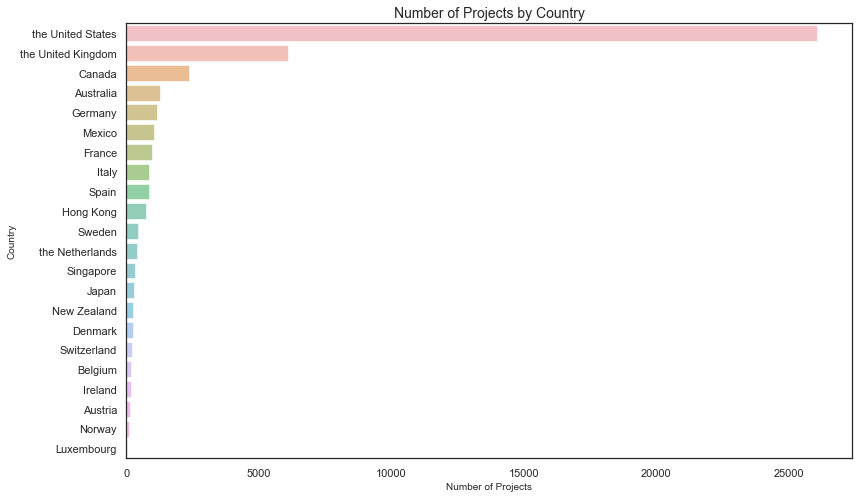

In [50]:
plt.figure(figsize=(13,8))
sns.barplot(x=country_counts.values, y=country_counts.index, alpha=0.6)
plt.title("Number of Projects by Country", fontsize=14)
plt.xlabel("Number of Projects", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.show()

In [60]:
df_2019.groupby('category_name')['category_specific'].value_counts()

category_name  category_specific     
3D Printing    technology/3d printing     108
Academic       publishing/academic        152
Accessories    fashion/accessories       1584
Action         film & video/action        101
Animals        photography/animals         25
                                         ... 
Woodworking    crafts/woodworking         157
Workshops      dance/workshops             14
World Music    music/world music          232
Young Adult    publishing/young adult     148
Zines          publishing/zines           152
Name: category_specific, Length: 169, dtype: int64

In [53]:
specific_category_counts = df_2019.groupby('category_name')['category_specific'].value_counts()
specific_category_counts.sort_values(ascending=False)

category_name   category_specific    
Tabletop Games  games/tabletop games     4047
Product Design  design/product design    3800
Comic Books     comics/comic books       1598
Accessories     fashion/accessories      1584
Illustration    art/illustration         1503
                                         ... 
Chiptune        music/chiptune             11
Weaving         crafts/weaving             10
Residencies     dance/residencies           8
Bacon           food/bacon                  3
Quilts          crafts/quilts               3
Name: category_specific, Length: 169, dtype: int64

In [62]:
specific_category_counts['Illustration']

category_specific
art/illustration    1503
Name: category_specific, dtype: int64

In [ ]:
plt.figure(figsize=(13,18))

plt.subplot(4,1,1)
a1 = sns.barplot(y=specific_category_counts['Tabletop Games'].index[:12], x=specific_category_counts['Tabletop Games'].values[:12], alpha=0.6)
a1.set_title("Activities in Tabletop Games Sector", fontsize=14)
a1.set_xlabel("Number of Projects", fontsize=10)
a1.set_ylabel("Specific Category", fontsize=10)

plt.subplot(4,1,2)
a2 = sns.barplot(y=specific_category_counts['Tabletop Games'].index[:12], x=specific_category_counts['Tabletop Games'].values[:12], alpha=0.6)
a2.set_title("Activities in Food Sector", fontsize=14)
a2.set_xlabel("Loans", fontsize=10)
a2.set_ylabel("Activities", fontsize=10)

plt.subplot(4,1,3)
a3 = sns.barplot(y=activity_sector['Retail'].index[:12], x=activity_sector['Retail'].values[:12], alpha=0.6)
a3.set_title("Activities in Retail Sector", fontsize=14)
a3.set_xlabel("Loans", fontsize=10)
a3.set_ylabel("Activities", fontsize=10)

plt.subplot(4,1,4)
a3 = sns.barplot(y=activity_sector['Services'].index[:12], x=activity_sector['Services'].values[:12], alpha=0.6)
a3.set_title("Activities in Services Sector", fontsize=14)
a3.set_xlabel("Loans", fontsize=10)
a3.set_ylabel("Activities", fontsize=10)

plt.show()

In [48]:
df_2019.columns

Index(['backers_count', 'blurb', 'category', 'category_name',
       'category_specific', 'converted_pledged_amount', 'country',
       'country_displayable_name', 'created_at', 'date_created', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'date_deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at',
       'date_launched', 'date_launched_year', 'location', 'location_name',
       'name', 'permissions', 'photo', 'photo_link', 'pledged', 'profile',
       'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'date_ended', 'static_usd_rate', 'urls', 'urls_web',
       'url_project', 'url_reward', 'usd_pledged', 'usd_type',
       'fund_recruitment_period', 'actual_time_taken'],
      dtype='object')

In [122]:
test1 = test[['date_launched_year', 'state']]
test1.head()

date_launched_year       state
0                2019  successful
1                2015  successful
2                2018      failed
3                2016  successful
4                2011      failed

In [124]:
test1.groupby('date_launched_year')['state'].value_counts()

date_launched_year  state     
2009                successful      177
                    failed           38
                    canceled         11
2010                successful     1019
                    failed          306
                    canceled         49
2011                successful     2942
                    failed          744
                    canceled        120
                    suspended         5
2012                successful     5868
                    failed         1606
                    canceled        119
                    suspended         1
2013                successful     7978
                    failed         1938
                    canceled        173
2014                successful    13176
                    failed        10864
                    canceled       1614
                    suspended        88
2015                failed        18491
                    successful    16205
                    canceled       2178
         

In [84]:
test1.groupby('date_launched_year')['state'].value_counts(normalize=True)

date_launched_year  state     
2009                successful    0.783186
                    failed        0.168142
                    canceled      0.048673
2010                successful    0.741630
                    failed        0.222707
                    canceled      0.035662
2011                successful    0.771976
                    failed        0.195224
                    canceled      0.031488
                    suspended     0.001312
2012                successful    0.772715
                    failed        0.211483
                    canceled      0.015670
                    suspended     0.000132
2013                successful    0.790762
                    failed        0.192090
                    canceled      0.017147
2014                successful    0.511848
                    failed        0.422034
                    canceled      0.062699
                    suspended     0.003419
2015                failed        0.497484
                    suc

In [81]:
test1.set_index('date_launched_year')

state
date_launched_year            
2019                successful
2015                successful
2018                    failed
2016                successful
2011                    failed
...                        ...
2010                    failed
2018                    failed
2019                    failed
2014                    failed
2015                    failed

[215800 rows x 1 columns]

In [87]:
import scipy
import sklearn
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io as sio

In [10]:
mat = sio.loadmat('attrann.mat')

In [4]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Aug  5 10:12:03 2014'), ('__version__', '1.0'), ('__globals__', []), ('attrann', array([[(array([[array(['n01322604_10013'], dtype='<U15')],
       [array(['n01322604_10275'], dtype='<U15')],
       [array(['n01322604_10456'], dtype='<U15')],
       ...,
       [array(['n13111881_1494'], dtype='<U14')],
       [array(['n13111881_15'], dtype='<U12')],
       [array(['n13111881_1517'], dtype='<U14')]], dtype=object), array([[array(['black'], dtype='<U5'), array(['blue'], dtype='<U4'),
        array(['brown'], dtype='<U5'), array(['furry'], dtype='<U5'),
        array(['gray'], dtype='<U4'), array(['green'], dtype='<U5'),
        array(['long'], dtype='<U4'), array(['metallic'], dtype='<U8'),
        array(['orange'], dtype='<U6'), array(['pink'], dtype='<U4'),
        array(['rectangular'], dtype='<U11'),
        array(['red'], dtype='<U3'), array(['rough'], dtype='<U5'),
        array(['round'], dtype='

In [19]:
mat['attrann']

array([[(array([[array(['n01322604_10013'], dtype='<U15')],
       [array(['n01322604_10275'], dtype='<U15')],
       [array(['n01322604_10456'], dtype='<U15')],
       ...,
       [array(['n13111881_1494'], dtype='<U14')],
       [array(['n13111881_15'], dtype='<U12')],
       [array(['n13111881_1517'], dtype='<U14')]], dtype=object), array([[array(['black'], dtype='<U5'), array(['blue'], dtype='<U4'),
        array(['brown'], dtype='<U5'), array(['furry'], dtype='<U5'),
        array(['gray'], dtype='<U4'), array(['green'], dtype='<U5'),
        array(['long'], dtype='<U4'), array(['metallic'], dtype='<U8'),
        array(['orange'], dtype='<U6'), array(['pink'], dtype='<U4'),
        array(['rectangular'], dtype='<U11'),
        array(['red'], dtype='<U3'), array(['rough'], dtype='<U5'),
        array(['round'], dtype='<U5'), array(['shiny'], dtype='<U5'),
        array(['smooth'], dtype='<U6'), array(['spotted'], dtype='<U7'),
        array(['square'], dtype='<U6'), array(['striped

In [55]:
attributes = mat['attrann']['attributes']
attributes

array([[array([[array(['black'], dtype='<U5'), array(['blue'], dtype='<U4'),
        array(['brown'], dtype='<U5'), array(['furry'], dtype='<U5'),
        array(['gray'], dtype='<U4'), array(['green'], dtype='<U5'),
        array(['long'], dtype='<U4'), array(['metallic'], dtype='<U8'),
        array(['orange'], dtype='<U6'), array(['pink'], dtype='<U4'),
        array(['rectangular'], dtype='<U11'),
        array(['red'], dtype='<U3'), array(['rough'], dtype='<U5'),
        array(['round'], dtype='<U5'), array(['shiny'], dtype='<U5'),
        array(['smooth'], dtype='<U6'), array(['spotted'], dtype='<U7'),
        array(['square'], dtype='<U6'), array(['striped'], dtype='<U7'),
        array(['vegetation'], dtype='<U10'),
        array(['violet'], dtype='<U6'), array(['wet'], dtype='<U3'),
        array(['white'], dtype='<U5'), array(['wooden'], dtype='<U6'),
        array(['yellow'], dtype='<U6')]], dtype=object)]], dtype=object)

In [56]:
labels = mat['attrann']['labels']
labels

array([[array([[ 0,  1,  0, ...,  0, -1, -1],
       [ 1, -1, -1, ...,  0, -1, -1],
       [ 1, -1,  0, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [ 0, -1, -1, ..., -1, -1, -1]], dtype=int16)]], dtype=object)

In [57]:
images = mat['attrann']['images']
images

array([[array([[array(['n01322604_10013'], dtype='<U15')],
       [array(['n01322604_10275'], dtype='<U15')],
       [array(['n01322604_10456'], dtype='<U15')],
       ...,
       [array(['n13111881_1494'], dtype='<U14')],
       [array(['n13111881_15'], dtype='<U12')],
       [array(['n13111881_1517'], dtype='<U14')]], dtype=object)]],
      dtype=object)

In [78]:
images[0][0]

array([[array(['n01322604_10013'], dtype='<U15')],
       [array(['n01322604_10275'], dtype='<U15')],
       [array(['n01322604_10456'], dtype='<U15')],
       ...,
       [array(['n13111881_1494'], dtype='<U14')],
       [array(['n13111881_15'], dtype='<U12')],
       [array(['n13111881_1517'], dtype='<U14')]], dtype=object)

추출하고 싶은 색상을 입력하세요 (orange, blue, green) :  orange


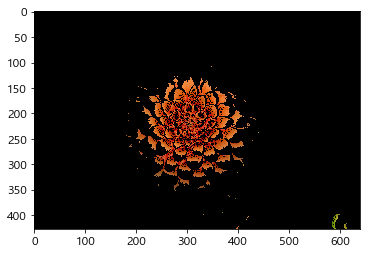

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

def RGB2HSV(RGB):
    # HSV 색상을 얻기 위해서는 array 타입이 float이 되어야 계산할 수 있다
    RGB_array = np.array(RGB).astype(np.float64)
    # 변환할 HSV 이미지 생성
    HSV = np.array(RGB).astype(np.float64)
    # RGB 이미지의 width, height 저장
    width, height = RGB_array.shape[:2]
    
    # 이미지 크기만큼 for 루프
    for i in range(width):
        for j in range(height):
            # 공식 따라서 구현
            var_R = RGB_array[i, j, 0] / 255.0
            var_G = RGB_array[i, j, 1] / 255.0
            var_B = RGB_array[i, j, 2] / 255.0
            C_Min = min(var_R, var_G, var_B)
            C_Max = max(var_R, var_G, var_B)
            change = C_Max - C_Min
            V = C_Max
            if C_Max == 0:
                S = 0
            else:
                S = change / C_Max
            if change == 0:
                H = 0
            else:
                if var_R == C_Max:
                    H = 60 * (((var_R - var_B)/change)%6)
                elif var_G == C_Max:
                    H = 60 * (((var_B - var_R)/change)+2)
                elif var_B == C_Max:
                    H = 60 * (((var_R - var_B)/change)+4)
            HSV[i, j, 0] = H
            HSV[i, j, 1] = S
            HSV[i, j, 2] = V
    return HSV

def Mask(HSV, color):
    # 범위값과 비교할 hsv 이미지 생성, 파라미터에 있는 HSV를 그냥 쓰면 원소값이 float이 아닌 int로 나옴
    hsv = np.array(HSV).astype(np.float64)
    # HSV 이미지의 width, height 저장
    width, height = HSV.shape[:2]
    # 모든 값은 원소 값이 0 인 마스크 행렬 생성
    mask = np.zeros((width, height))

    # hsv 값과 범위 비교
    for i in range(width):
        for j in range(height):
            # H, S, V 값이 원하는 범위 안에 들어갈 경우 mask 원소 값을 1로 만든다
            if hsv[i, j, 0] > lower[color][0] and hsv[i, j, 1] > lower[color][1] and hsv[i, j, 2] > lower[color][2] and hsv[i, j, 0] < upper[color][0] and hsv[i, j, 1] < upper[color][1] and hsv[i, j, 2] < upper[color][2]:
                mask[i, j] = 1
    return mask

def Extraction(image, mask):
    # Object를 추출할 이미지를 생성
    result_img = np.array(image)
    # RGB 이미지의 width, height 저장
    width, height = image.shape[:2]

    # for 루프를 돌면서 mask 원소 값이 0인 인덱스는 원본 이미지도 0으로 만들어 준다.
    for i in range(width):
        for j in range(height):
            if(mask[i, j] == 0):
                result_img[i, j, 0] = 0
                result_img[i, j, 1] = 0
                result_img[i, j, 2] = 0
    return result_img

if __name__ == '__main__':

    # 마스크 색상 범위에 사용할 딕셔너리 정의
    upper = {}
    lower = {}
    upper['orange'] = [100, 1, 1]
    upper['blue'] = [300, 1, 1]
    upper['green'] = [180, 0.7, 0.5]
    lower['orange'] = [0, 0.7, 0.5]
    lower['blue'] = [70, 0.7, 0.2]
    lower['green'] = [101, 0.15, 0]

    # 이미지 파일을 읽어온다
    input_image = mping.imread('flower.jpg')

    # 추출하고 싶은 색상 입력
    input_color = input("추출하고 싶은 색상을 입력하세요 (orange, blue, green) : ")

    # RGB to HSV 변환
    HSV = RGB2HSV(input_image)

    # HSV 이미지를 가지고 마스크 생성
    mask = Mask(HSV, input_color)

    # mask를 가지고 원본이미지를 Object 추출 이미지로 변환
    result_image = Extraction(input_image, mask)

    #mping.imsave("result.jpg", result_image)

    # 이미지 보여주기
    imgplot = plt.imshow(result_image)
    plt.show()

In [ ]:
#if PIL is giving you an image with mode “P” or pretty much any mode that isn’t “RGBA”,
#then you need to apply an alpha mask to convert it to RGBA.
#You can do that pretty easily with:

if im.mode == 'P':
    im.putalpha(0)

In [ ]:
#average colors

In [34]:
from PIL import Image

def compute_average_image_color(img):
    width, height = img.size

    r_total = 0
    g_total = 0
    b_total = 0

    count = 0
    for x in range(0, width):
        for y in range(0, height):
            r, g, b = img.getpixel((x,y))
            r_total += r
            g_total += g
            b_total += b
            count += 1

    return (r_total/count, g_total/count, b_total/count)

img = Image.open('flower.jpg')
#img = img.resize((50,50))  # Small optimization
average_color = compute_average_image_color(img)
print(average_color)

(55.13415178571429, 73.57914227166276, 57.000212236533955)


In [48]:
from PIL import Image
import numpy as np

def getAverageRGBN(image):
  # get image as numpy array
    im = np.array(image)
  # get shape
    w,h,d = im.shape
  # change shape
    im.shape = (w*h, d)
  # get average
    return tuple(np.average(im, axis=0))

test_image = Image.open('19.png')
getAverageRGBN(test_image)

(145.0968537414966, 153.37739795918367, 153.67507369614512, 254.96823696145125)

In [49]:
def getAverageRGBN(image):
  # get image as numpy array
    im = np.array(image)
  # get shape
    w,h,d = im.shape
  # change shape
    im.shape = (w*h, d)
  # get average
    return tuple(im.mean(axis=0))

test_image = Image.open('19.png')
getAverageRGBN(test_image)

(145.0968537414966, 153.37739795918367, 153.67507369614512, 254.96823696145125)

In [44]:
np.array(test_image).shape

(315, 560, 4)

In [ ]:
#To get image palette

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("19.png")
im = im.convert("P")
im = im.convert("P", palette = Image.ADAPTIVE, colors = 16)

In [20]:
im.palette

In [21]:
im.getcolors()
#(count, rgbaColor ), ( count, rgbaColor )

[(19, 0),
 (13, 1),
 (13, 2),
 (12, 3),
 (11, 4),
 (10, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (7, 10),
 (7, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (5, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (5, 20),
 (5, 21),
 (4, 22),
 (4, 23),
 (4, 24),
 (4, 25),
 (4, 26),
 (4, 27),
 (3, 28),
 (3, 29),
 (3, 30),
 (2, 31),
 (2, 32),
 (2, 33),
 (2, 34),
 (1, 35),
 (1, 36),
 (13144, 37),
 (12033, 38),
 (10299, 39),
 (9876, 40),
 (9689, 41),
 (9220, 42),
 (8703, 43),
 (8273, 44),
 (7978, 45),
 (7568, 46),
 (7379, 47),
 (4836, 48),
 (4666, 49),
 (3906, 50),
 (3870, 51),
 (3276, 52),
 (3220, 53),
 (2513, 54),
 (2285, 55),
 (1963, 56),
 (1778, 57),
 (1576, 58),
 (1544, 59),
 (1522, 60),
 (1514, 61),
 (1406, 62),
 (1405, 63),
 (1342, 64),
 (1075, 65),
 (965, 66),
 (955, 67),
 (916, 68),
 (849, 69),
 (836, 70),
 (814, 71),
 (778, 72),
 (768, 73),
 (708, 74),
 (668, 75),
 (610, 76),
 (555, 77),
 (509, 78),
 (479, 79),
 (458, 80),
 (445, 81),
 (443, 82),
 (433, 83),
 (431, 84),
 (378, 85),
 (373, 86),
 (

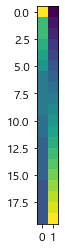

In [22]:
plt.imshow(im.getcolors()[:20])
plt.show()

In [ ]:
#To get image palette

In [73]:
import numpy as np
from PIL import Image

def palette(img):
    """
    Return palette in descending order of frequency
    """
    arr = np.asarray(img)
    palette, index = np.unique(asvoid(arr).ravel(), return_inverse=True)
    palette = palette.view(arr.dtype).reshape(-1, arr.shape[-1])
    count = np.bincount(index)
    order = np.argsort(count)
    return palette[order[::-1]]

def asvoid(arr):
    """View the array as dtype np.void (bytes)
    This collapses ND-arrays to 1D-arrays, so you can perform 1D operations on them.
    http://stackoverflow.com/a/16216866/190597 (Jaime)
    http://stackoverflow.com/a/16840350/190597 (Jaime)
    Warning:
    >>> asvoid([-0.]) == asvoid([0.])
    array([False], dtype=bool)
    """
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))

img = Image.open('19.png', 'r').convert('RGB')
print(palette(img)[:10]) #To get the top ten colors
# returns numpy array; each row can be interpreted as a color

[[  0 174 239]
 [ 11 161  75]
 [247 148  30]
 [237  28  36]
 [255 255 255]
 [  0   0   0]
 [168 163 171]
 [236  28  36]
 [  0 173 238]
 [168 163 170]]


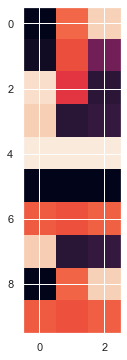

In [74]:
plt.imshow(palette(img)[:10])
plt.show()

In [ ]:
#To get image palette

In [ ]:
#https://github.com/fengsp/color-thief-py

In [ ]:
pip install colorthief

import sys

if sys.version_info < (3, 0):
    from urllib2 import urlopen
else:
    from urllib.request import urlopen

import io
from colorthief import ColorThief

fd = urlopen('http://lokeshdhakar.com/projects/color-thief/img/photo1.jpg')
f = io.BytesIO(fd.read())
color_thief = ColorThief(f)
print(color_thief.get_color(quality=1))
print(color_thief.get_palette(quality=1))

In [ ]:
#To exctract colors from images

In [ ]:
# colorgram.py
# https://github.com/obskyr/colorgram.py

pip install colorgram.py

import colorgram

# Extract 6 colors from an image.
colors = colorgram.extract('sweet_pic.jpg', 6)

# colorgram.extract returns Color objects, which let you access
# RGB, HSL, and what proportion of the image was that color.
# colorgram.Color
# Color.rgb - The color represented as a namedtuple of RGB from 0 to 255, e.g. (r=255, g=151, b=210).
# Color.hsl - The color represented as a namedtuple of HSL from 0 to 255, e.g. (h=230, s=255, l=203).
# Color.proportion - The proportion of the image that is in the extracted color from 0 to 1, e.g. 0.34
first_color = colors[0] #객체 생성한 것 같은데?
rgb = first_color.rgb # e.g. (255, 151, 210)
hsl = first_color.hsl # e.g. (230, 255, 203)
proportion  = first_color.proportion # e.g. 0.34

# RGB and HSL are named tuples, so values can be accessed as properties.
# These all work just as well:
red = rgb[0]
red = rgb.r
saturation = hsl[1]
saturation = hsl.s

#colorgram.extract(image, number_of_colors)
# Extract colors from an image. image may be either a path to a file,
# a file-like object, or a Pillow Image object. The function will return a list of number_of_colors Color objects.

In [ ]:
#To sort the colors you get by HSL
colors.sort(key=lambda c: c.hsl.h)
# or...
sorted(colors, key=lambda c: c.hsl.h)

In [ ]:
#To Find Dominant Colors in an Image through Clustering
    # https://www.dataquest.io/blog/tutorial-colors-image-clustering-python/

In [27]:
from matplotlib import image as img
image = img.imread('./flower.jpg')
image.shape

(427, 640, 3)

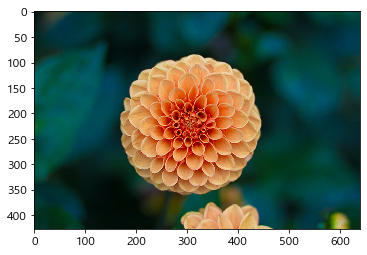

In [28]:
plt.imshow(image)

In [29]:
r = []
g = []
b = []

for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

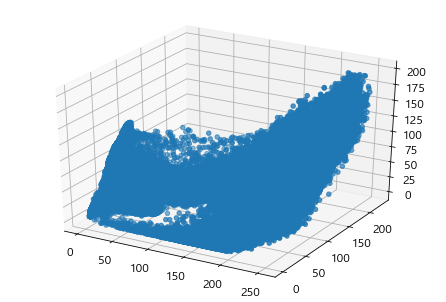

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [31]:
import pandas as pd
df = pd.DataFrame({'red': r, 'blue': b, 'green': g})

In [32]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

red  blue  green  scaled_red  scaled_blue  scaled_green
17271     0    67     59    0.000000     2.016550      1.296395
115882    1    80     88    0.011234     2.407821      1.933606
63416     1    64     77    0.011234     1.926257      1.691905
72434     0   100     85    0.000000     3.009776      1.867687
235122   60    21     56    0.674036     0.632053      1.230476
109701  229    42    112    2.572569     1.264106      2.460953
69024     0    62     70    0.000000     1.866061      1.538095
1961     65    60     76    0.730205     1.805866      1.669932
130471    0    76     67    0.000000     2.287430      1.472177
54114    21    31     33    0.235912     0.933031      0.725102

In [33]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

In [34]:
print(cluster_centers)

[[0.17382497 1.19080796 1.4437115 ]
 [2.42412721 3.34203284 2.81681598]]


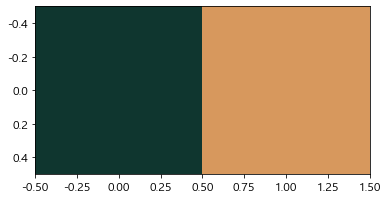

In [40]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((scaled_r * r_std / 255, scaled_g * g_std / 255, scaled_b * b_std / 255))
plt.imshow([colors])
plt.show()

In [ ]:
#dominant colors

In [ ]:
pip install colorthief

from colorthief import ColorThief
color_thief = ColorThief('/path/to/imagefile')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)

#It can also find color pallete
palette = color_thief.get_palette(color_count=6)

In [ ]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5

print('reading image')
im = Image.open('image.jpg')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

In [66]:
from matplotlib import image as img
import pandas as pd
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans

def get_dominant_colors(image):
    r = []
    g = []
    b = []
    for line in image:
        for pixel in line:
            temp_r, temp_g, temp_b = pixel
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)
    df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
    df['scaled_red'] = whiten(df['red'])
    df['scaled_blue'] = whiten(df['blue'])
    df['scaled_green'] = whiten(df['green'])
    df.sample(n = 10)
    cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)
    print(cluster_centers)
    colors = []
    r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
    for cluster_center in cluster_centers:
        scaled_r, scaled_g, scaled_b = cluster_center
        colors.append((scaled_r * r_std / 255, scaled_g * g_std / 255, scaled_b * b_std / 255))
    plt.imshow([colors])
    plt.show()

In [68]:
image = img.imread('./19.png')
#image.shape

get_dominant_colors(image)

ValueError: too many values to unpack (expected 3)